In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skipper import observe
from astropy import coordinates

import sys
sys.path.append('../scripts/')
from sigjson_f2021b import *

In [16]:
backup_fields = ['SXDS','COSMOS']
backup_centers = [coordinates.SkyCoord ("35.739030633438745 -4.7489828727193775", unit='deg'),
                  coordinates.SkyCoord ("10h00m28.6s+02d12m21.0s") ]

In [6]:
year,month,day = 2021,9,10

In [10]:
mfilt, field, slot = whichfield (year,month,day)

In [11]:
ctio = observe.ObservingSite ()

In [12]:
night_start, night_end = ctio.get_sunriseset ( year, month, day, cut_at_contract=True )

True night end is:
obsEnd:   2021/09/11 06:45 AM Santiago
          2021/09/11 09:45 AM UTC
Updated night end is:
obsEnd:   2021/09/11 06:05 AM Santiago
          2021/09/11 09:05 AM UTC


In [13]:
if slot == 0:
    print('[predict] night slot: Full night')
    obs_start = night_start
    obs_end = night_end
elif slot == 1:
    print('[predict] night slot: First half')
    obs_start = night_start
    obs_end = obs_start + 0.5*(night_end-obs_start)
else:
    print('[predict] night slot: Second half')
    obs_start = night_start + 0.5*(night_end-night_start)
    obs_end = night_end 

[predict] night slot: Second half


In [19]:
obsframe = ctio.define_obsframe ( obs_start=obs_start, obs_end=obs_end )

In [20]:
alt_l = [ ctio.get_altitude(cc, obsframe) for cc in backup_centers]

In [23]:
ix=0
htime = alt_l[0][ix].obstime.datetime    

(2.0, 1.0)

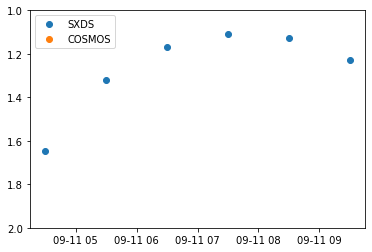

In [39]:
for iw in range(len(backup_centers)):
    fname = backup_fields[iw]
    plt.plot ( [alt_l[iw][ix].obstime.datetime for ix in range(len(alt_l[iw]))], alt_l[iw].secz,'o',
              label=fname
             )
plt.legend()
plt.ylim(2.,1.)

In [51]:
dtime = [ alt_l[iw][ix].obstime.datetime for ix in range(len(alt_l[iw]))]
hd = 'time (UTC)\t\t'
for iw in range(len(backup_centers)):
    hd = f'{hd}{backup_fields[iw]}\t'
print(hd)    
for iv in range(len(dtime)):
    dt = dtime[iv]
    st = f'{dt.strftime(fmt)}\t'
    for iw in range(len(backup_centers)):
        fname = backup_fields[iw]
        airmass = alt_l[iw].secz[iv]
        st = f'{st}{airmass:.2f}\t'
    print(st)

time (UTC)		SXDS	COSMOS	
2021/09/11 04:30 AM	1.65	-1.18	
2021/09/11 05:30 AM	1.32	-1.33	
2021/09/11 06:30 AM	1.17	-1.64	
2021/09/11 07:30 AM	1.11	-2.35	
2021/09/11 08:30 AM	1.13	-4.66	
2021/09/11 09:30 AM	1.23	94.53	


In [54]:
bfly = open('../resources/bfly.txt','r').read()
print(bfly)

 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 


In [57]:
tele_fname = '/Users/kadofong/Downloads/tele20210317.csv'
tele = load_telemetry ( tele_fname )

In [59]:
tele['object']

0                                                  G09
1                                                  G09
2                                                  G09
3      GAMA_J083742.61+023654.55_N708_1minexp_checksky
4      GAMA_J083742.61+023654.55_N708_1minexp_checksky
5      GAMA_J083742.61+023654.55_N708_1minexp_checksky
6               GAMA_J083742.61+023654.55_N708_1minexp
7                       GAMA_J083742.61+023654.55_N708
8                       GAMA_J083853.27+023328.79_N708
9                       GAMA_J085148.38-004417.47_N708
10                      GAMA_J085258.92-004635.42_N708
11                      GAMA_J085409.45-004854.65_N708
12            COSMOS_J100007.53+020921.98_N708_1minexp
13                    COSMOS_J100007.53+020921.98_N708
14                    COSMOS_J100022.90+020659.07_N708
15                    COSMOS_J100022.19+020744.83_N708
16                    COSMOS_J100013.36+021048.38_N708
17                    COSMOS_J100005.83+021146.51_N708
18        

In [79]:
iu = 2

In [80]:
json = pd.read_json(f'../json/backup_scripts/COSMOS_AGN_g_{iu:02d}.json')

In [81]:
np.in1d(json['object'], tele['object'])

array([ True, False, False, False, False])

In [82]:
json

,RA,comment,count,dec,expTime,expType,filter,object,program,propid,proposer,seqid,seqnum,seqtot,wait
0,150.142345,OneMinuteFocusExposure,1,2.204383,60,object,g,1minexp_000,Merian,2020B-0288,Leauthaud,S2021A,1,5,False
1,150.142345,--,1,2.204383,600,object,g,COSMOS_J100034.16+021215.77_g,Merian,2020B-0288,Leauthaud,S2021A,2,5,False
2,150.039056,--,1,2.175702,600,object,g,COSMOS_J100009.37+021032.52_g,Merian,2020B-0288,Leauthaud,S2021A,3,5,False
3,150.117298,--,1,2.307379,600,object,g,COSMOS_J100028.15+021826.56_g,Merian,2020B-0288,Leauthaud,S2021A,4,5,False
4,150.094188,--,1,2.265376,600,object,g,COSMOS_J100022.60+021555.35_g,Merian,2020B-0288,Leauthaud,S2021A,5,5,False
